In [92]:
import numpy as np
import pandas as pd
import pickle
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

In [93]:
data = pd.read_csv("Data/dataset.csv")
data

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
...,...,...,...,...
2714,12.30,94.80,10.0,4.8
2715,24.70,94.30,40.0,4.1
2716,22.50,88.10,10.0,3.6
2717,24.60,94.20,54.0,3.5


<Axes: >

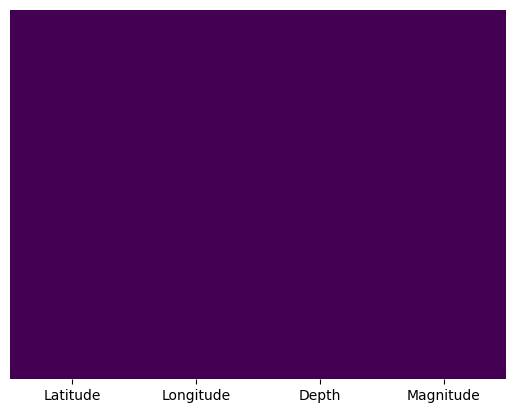

In [94]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [95]:

data = np.array(data)
data

array([[29.06, 77.42,  5.  ,  2.5 ],
       [19.93, 72.92,  5.  ,  2.4 ],
       [31.5 , 74.37, 33.  ,  3.4 ],
       ...,
       [22.5 , 88.1 , 10.  ,  3.6 ],
       [24.6 , 94.2 , 54.  ,  3.5 ],
       [14.5 , 92.9 , 10.  ,  4.6 ]], shape=(2719, 4))

In [96]:
X = data[:, 0:-1]
y = data[:, -1]
y = y.astype('int')
X = X.astype('int')
y

array([2, 2, 3, ..., 3, 3, 4], shape=(2719,))

In [97]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
print(X_train,y_train)

[[ 22  94  10]
 [ 27  75   5]
 [ 34  76  10]
 ...
 [ 31  76   5]
 [ 23  70  10]
 [ 37  72 125]] [4 2 2 ... 3 4 4]


In [100]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
y_pred = rfc.predict(X_test)

/var/folders/st/whw8dc1n6sx_nmp_9r1qhlpr0000gn/T/ipykernel_83516/996362912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

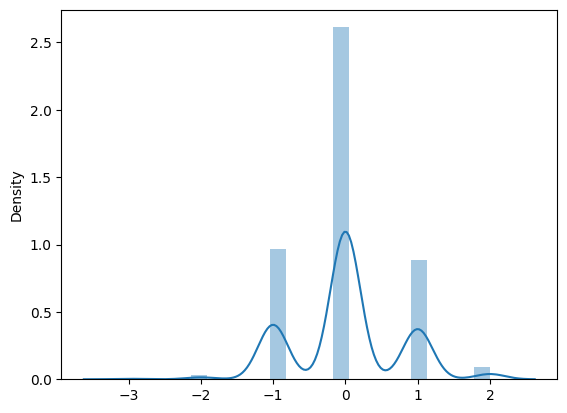

In [102]:
prediction=rfc.predict(X_test)
sns.distplot(y_test-prediction)

In [103]:
metrics.accuracy_score(y_test, y_pred)

0.5680147058823529

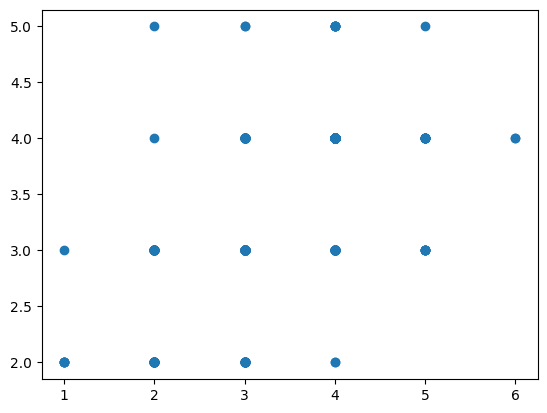

In [104]:
plt.scatter(y_test,y_pred)

In [105]:
# open a file to store the data
file = open('random_forest_classifier_model.pkl', 'wb')

# dumpomg information to that file
pickle.dump(rfc, file)

In [106]:
#importing the descision tree classifier from the sklearn tree 
tree = GradientBoostingClassifier() 
clf = tree.fit(X_train,y_train)

y_pred_GBC = clf.predict(X_test) 
metrics.accuracy_score(y_test,y_pred_GBC)

0.5808823529411765

In [107]:
# open a file to store the data
file = open('Gradient_Boosting_Classifier.pkl', 'wb')

# dumpomg information to that file
pickle.dump(clf, file)

In [108]:
from sklearn.svm import SVC

tree = SVC(gamma='auto') 
svc_cl = tree.fit(X_train,y_train) 

y_pred_SVC = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred_SVC)

0.5808823529411765

In [109]:
# open a file to store the data
file = open('SVC.pkl', 'wb')

# dumpomg information to that file
pickle.dump(svc_cl, file)